In [ ]:
import os
import uuid
import time
import cv2

In [ ]:
IMAGES_PATH = os.path.join('Data','Images')
number_images=30

In [ ]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print(f'Collecting image {imgnum}')
    ret,frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{uuid.uuid1()}.jpg')
    cv2.imwrite(imgname,frame)
    cv2.imshow('frame',frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
!labelme

In [ ]:
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
images=tf.data.Dataset.list_files('./Data/Images/*.jpg',shuffle=False)

In [ ]:
len(images)

130

In [ ]:
images.as_numpy_iterator().next()

b'./Data/Images/10a6d220-54ab-11ee-a47d-80d21deeeff4.jpg'

In [ ]:
def load_img(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
images = images.map(load_img)

array([[[135, 150, 155],
        [135, 150, 155],
        [136, 149, 155],
        ...,
        [148, 152, 155],
        [149, 153, 156],
        [148, 152, 155]],

       [[133, 148, 153],
        [133, 148, 153],
        [135, 148, 154],
        ...,
        [148, 152, 155],
        [148, 152, 155],
        [147, 151, 154]],

       [[135, 148, 156],
        [135, 148, 156],
        [135, 148, 156],
        ...,
        [149, 153, 156],
        [149, 153, 156],
        [149, 153, 156]],

       ...,

       [[  6,   8,   7],
        [  5,   7,   6],
        [  7,   9,   8],
        ...,
        [ 28,  26,  29],
        [ 25,  23,  26],
        [ 32,  30,  33]],

       [[  8,  10,   9],
        [  6,   8,   7],
        [  7,   9,   8],
        ...,
        [ 24,  22,  25],
        [ 28,  26,  29],
        [ 24,  22,  25]],

       [[  4,   6,   5],
        [  1,   3,   2],
        [  1,   3,   2],
        ...,
        [ 19,  17,  20],
        [ 24,  22,  25],
        [ 26,  24,  27]]], dtype=uint8)
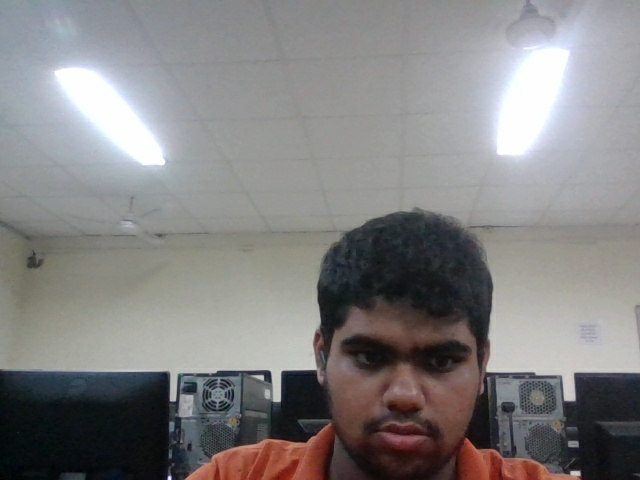

In [ ]:
images.as_numpy_iterator().next()

In [ ]:
image_generator = images.batch(4).as_numpy_iterator()

In [ ]:
plot_images = image_generator.next()

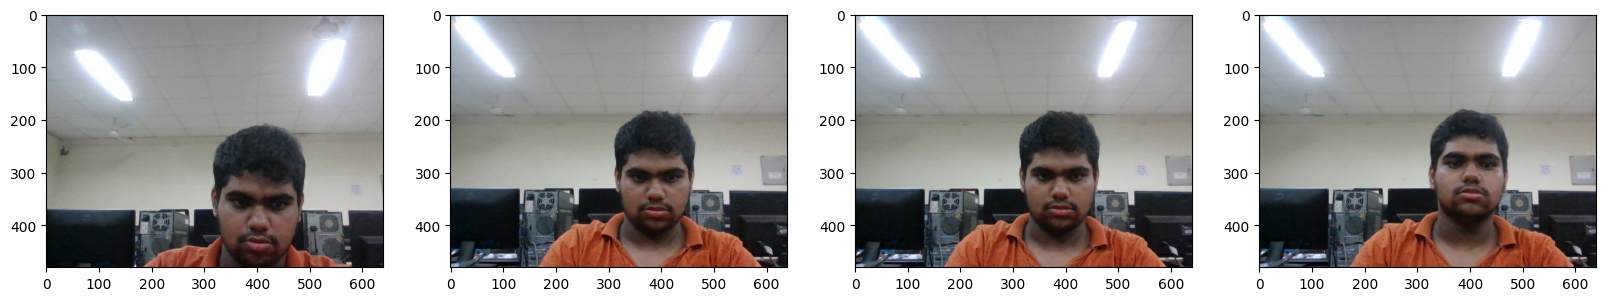

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [ ]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('Data',folder,'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('Data','Labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('Data',folder,'labels',filename)
            os.replace(existing_filepath,new_filepath)

In [ ]:
import albumentations as alb

In [ ]:
augmentor = alb.Compose([alb.RandomCrop(width=450,height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                         bbox_params = alb.BboxParams(format='albumentations',
                                                      label_fields=['class_labels']))

In [ ]:
img = cv2.imread(os.path.join('Data','train','images','10a6d220-54ab-11ee-a47d-80d21deeeff4.jpg'))

In [ ]:
img.shape

(480, 640, 3)

array([[[158, 150, 137],
        [157, 149, 136],
        [157, 149, 136],
        ...,
        [156, 152, 151],
        [157, 152, 149],
        [157, 152, 149]],

       [[156, 148, 135],
        [156, 148, 135],
        [156, 148, 135],
        ...,
        [155, 151, 150],
        [156, 151, 148],
        [156, 151, 148]],

       [[156, 148, 135],
        [156, 148, 135],
        [156, 148, 135],
        ...,
        [157, 153, 152],
        [158, 153, 150],
        [157, 152, 149]],

       ...,

       [[ 10,   8,   8],
        [  9,   7,   7],
        [ 10,   8,   8],
        ...,
        [ 32,  27,  29],
        [ 29,  24,  26],
        [ 36,  31,  33]],

       [[ 11,   9,   9],
        [ 10,   8,   8],
        [ 10,   8,   8],
        ...,
        [ 27,  21,  26],
        [ 31,  25,  30],
        [ 28,  22,  27]],

       [[  8,   6,   6],
        [  5,   3,   3],
        [  5,   3,   3],
        ...,
        [ 22,  16,  21],
        [ 26,  20,  25],
        [ 28,  22,  27]]], dtype=uint8)
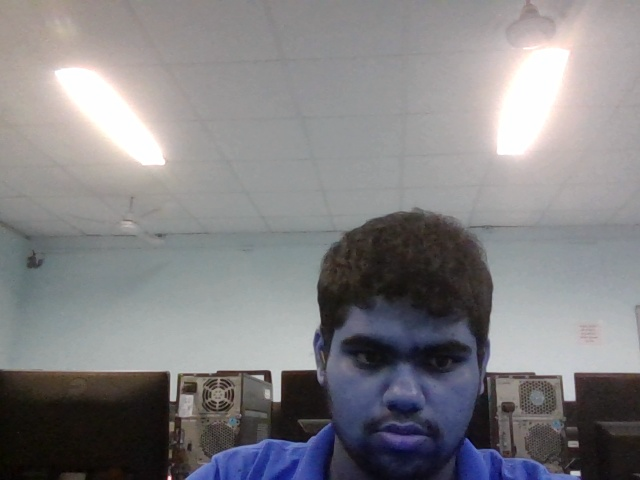

In [ ]:
img

In [ ]:
with open(os.path.join('Data','train','labels','10a6d220-54ab-11ee-a47d-80d21deeeff4.json')) as f:
  label = json.load(f)

In [ ]:
label

{'version': '5.3.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[317.56097560975616, 207.47967479674796],
    [493.9837398373984, 473.3333333333333]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\Images\\10a6d220-54ab-11ee-a47d-80d21deeeff4.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGR

In [ ]:
label['shapes'][0]['points']

[[317.56097560975616, 207.47967479674796],
 [493.9837398373984, 473.3333333333333]]

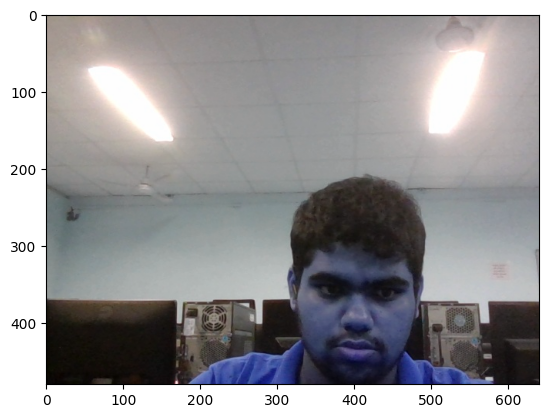

In [ ]:
plt.imshow(img)

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [ ]:
coords

[317.56097560975616, 207.47967479674796, 493.9837398373984, 473.3333333333333]

In [ ]:
coords = list(np.divide(coords,[640,480,640,480]))

In [ ]:
coords

[0.496189024390244, 0.4322493224932249, 0.771849593495935, 0.986111111111111]

In [ ]:
augmented = augmentor(image = img, bboxes = [coords], class_labels = ['face'])

In [ ]:
augmented

{'image': array([[[172, 151, 151],
         [173, 152, 152],
         [172, 151, 151],
         ...,
         [161, 147, 156],
         [162, 148, 157],
         [161, 146, 157]],
 
        [[172, 151, 151],
         [173, 152, 152],
         [173, 152, 152],
         ...,
         [161, 147, 156],
         [162, 148, 157],
         [162, 148, 157]],
 
        [[172, 151, 151],
         [171, 150, 150],
         [172, 151, 151],
         ...,
         [161, 147, 156],
         [162, 148, 157],
         [162, 148, 157]],
 
        ...,
 
        [[ 22,   5,  11],
         [ 22,   7,  12],
         [ 23,   8,  13],
         ...,
         [ 47,  45, 141],
         [ 46,  47, 142],
         [ 48,  48, 145]],
 
        [[ 20,   3,   9],
         [ 21,   6,  11],
         [ 21,   6,  11],
         ...,
         [ 46,  44, 140],
         [ 46,  47, 142],
         [ 52,  52, 149]],
 
        [[ 17,   0,   6],
         [ 20,   4,  12],
         [ 21,   5,  13],
         ...,
         [ 42,  40,

In [ ]:
augmented['image'].shape

(450, 450, 3)

In [ ]:
augmented['bboxes']

[(0.6545799457994581, 0.4232881662149955, 1.0, 1.0)]

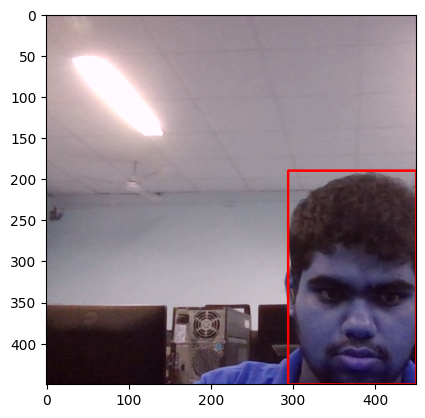

In [ ]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
              (255,0,0),2)

plt.imshow(augmented['image'])

In [ ]:
for folder in ['train','test','val']:
    for image in os.listdir(os.path.join('Data', folder, 'images')):
        img = cv2.imread(os.path.join('Data', folder, 'images', image))

        coords = [0,0,0.000001,0.000001]
        label_path = os.path.join('Data', folder, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try:
            for x in range(120):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('Aug_data', folder, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0

                with open(os.path.join('Aug_data', folder, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [ ]:
train_images = tf.data.Dataset.list_files('./Aug_data/train/images/*.jpg',shuffle=False)
train_images = train_images.map(load_img)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [ ]:
len(os.listdir(os.path.join('Aug_data', 'train','labels')))

10920

In [ ]:
val_images = tf.data.Dataset.list_files('./Aug_data/val/images/*.jpg',shuffle=False)
val_images = val_images.map(load_img)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [ ]:
test_images = tf.data.Dataset.list_files('./Aug_data/test/images/*.jpg',shuffle=False)
test_images = test_images.map(load_img)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()

array([[[0.04166667, 0.05735294, 0.06617647],
        [0.040625  , 0.05539216, 0.0596201 ],
        [0.05      , 0.05392157, 0.06176471],
        ...,
        [0.1721201 , 0.19172794, 0.20349264],
        [0.1403799 , 0.15998775, 0.17996323],
        [0.11421569, 0.12892157, 0.15980393]],

       [[0.0372549 , 0.05294118, 0.06470589],
        [0.04221814, 0.05790441, 0.06881128],
        [0.03394608, 0.04963235, 0.05355392],
        ...,
        [0.18026961, 0.19987746, 0.21164216],
        [0.1088848 , 0.12849265, 0.14325981],
        [0.11917892, 0.1338848 , 0.15631127]],

       [[0.0382353 , 0.05539216, 0.06715687],
        [0.0382353 , 0.05784314, 0.06960785],
        [0.03431373, 0.05392157, 0.06568628],
        ...,
        [0.17757353, 0.20110294, 0.20110294],
        [0.08443628, 0.10012255, 0.11188725],
        [0.18621324, 0.20189951, 0.209375  ]],

       ...,

       [[0.4898897 , 0.5016544 , 0.52910537],
        [0.4897059 , 0.50147057, 0.5210784 ],
        [0.4852941 , 0

In [ ]:
def load_labels(label_path):
  with open(label_path.numpy(), 'r', encoding='utf-8') as f:
    label = json.load(f)
  return [label['class']], label['bbox']

In [ ]:
train_labels = tf.data.Dataset.list_files('./Aug_data/train/labels/*.json',shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
val_labels = tf.data.Dataset.list_files('./Aug_data/val/labels/*.json',shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
test_labels = tf.data.Dataset.list_files('./Aug_data/test/labels/*.json',shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.4412, 0.    , 0.8335, 0.548 ], dtype=float16))

In [ ]:
len(train_images), len(train_labels), len(val_images), len(val_labels), len(test_images), len(test_labels)

(10920, 10920, 2400, 2400, 2280, 2280)

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(12000)
train = train.batch(8)
train = train.prefetch(4)

In [ ]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(3000)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(3000)
test = test.batch(8)
test = test.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()

(array([[[[0.63082105, 0.2564338 , 0.1338848 ],
          [0.6259191 , 0.25349265, 0.14485294],
          [0.6811274 , 0.30465686, 0.21053922],
          ...,
          [0.21237744, 0.2463848 , 0.3026348 ],
          [0.22414216, 0.28198528, 0.3629902 ],
          [0.43835783, 0.49859068, 0.5996324 ]],
 
         [[0.6302083 , 0.24454656, 0.12120098],
          [0.5992647 , 0.21495098, 0.10906862],
          [0.65496325, 0.27751225, 0.17849265],
          ...,
          [0.24056372, 0.27567402, 0.32083333],
          [0.29626226, 0.37610295, 0.47273284],
          [0.35931373, 0.46041667, 0.6033701 ]],
 
         [[0.6455882 , 0.2673407 , 0.12365196],
          [0.65882355, 0.2784314 , 0.14993873],
          [0.63278186, 0.25232843, 0.12702206],
          ...,
          [0.30404413, 0.37996325, 0.43590686],
          [0.1971201 , 0.33278185, 0.44117647],
          [0.13970588, 0.3211397 , 0.4670343 ]],
 
         ...,
 
         [[0.9939338 , 1.        , 0.98609066],
          [0.97671

In [ ]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [ ]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1]], dtype=uint8),
 array([[0.3977, 0.3857, 0.7534, 0.81  ],
        [0.7456, 0.276 , 1.    , 0.955 ],
        [0.471 , 0.1818, 0.7925, 0.6333],
        [0.2766, 0.0921, 0.629 , 0.5996],
        [0.4731, 0.1544, 0.9756, 0.8555],
        [0.233 , 0.4492, 0.6323, 1.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.2131, 0.4438, 0.847 ]], dtype=float16))

In [ ]:
img_samples = train.as_numpy_iterator()
res = img_samples.next()

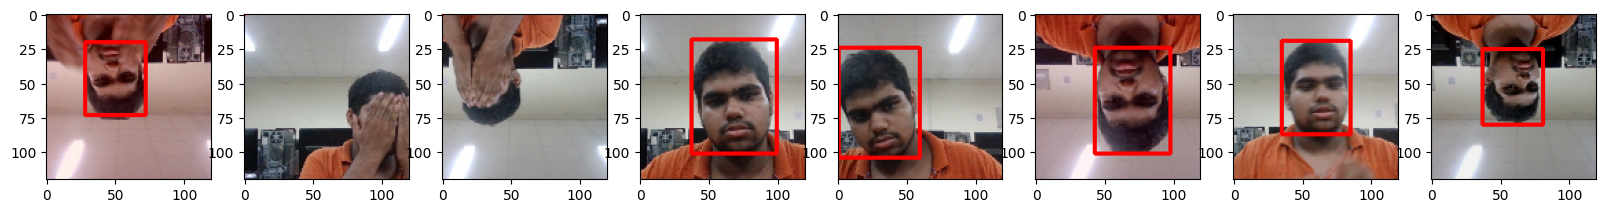

In [ ]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx in range(8):
  sample_image = res[0][idx]
  sample_coords = res[1][1][idx]

  cv2.rectangle(sample_image,
                tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                (255,0,0), 2)

  ax[idx].imshow(sample_image)
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [ ]:
vgg = VGG16(include_top = False)

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
def build_model():
  input_layer = Input(shape=(120,120,3))
  vgg = VGG16(include_top = False)(input_layer)

  f1 = GlobalMaxPooling2D()(vgg)
  class1 = Dense(2048, activation = 'relu')(f1)
  class2 = Dense(1, activation='sigmoid')(class1)

  f2 = GlobalMaxPooling2D()(vgg)
  regress1 = Dense(2048, activation='relu')(f2)
  regress2 = Dense(4, activation='sigmoid')(regress1)

  facetracker = Model(inputs = input_layer, outputs = [class2, regress2])
  return facetracker

In [ ]:
facetracker = build_model()

In [ ]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [ ]:
X,y = train.as_numpy_iterator().next()

In [ ]:
X.shape

(8, 120, 120, 3)

In [ ]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 3s 3s/step


In [ ]:
classes, coords

(array([[0.5956065 ],
        [0.57479495],
        [0.5868543 ],
        [0.5595002 ],
        [0.5591679 ],
        [0.6024703 ],
        [0.4706156 ],
        [0.63073456]], dtype=float32),
 array([[0.4954523 , 0.54868394, 0.19491382, 0.4576739 ],
        [0.46125552, 0.5494886 , 0.20293278, 0.44406593],
        [0.5339303 , 0.5994987 , 0.22574052, 0.4644426 ],
        [0.53825015, 0.5310578 , 0.1967237 , 0.47390053],
        [0.5088345 , 0.6323617 , 0.14578895, 0.5046572 ],
        [0.62913483, 0.4483661 , 0.18619794, 0.5501286 ],
        [0.51345813, 0.5432303 , 0.21665797, 0.462294  ],
        [0.49650306, 0.51150143, 0.20507535, 0.48086235]], dtype=float32))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [ ]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.24823>

In [ ]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.64272076>

In [ ]:
class FaceTracker(Model):
    def __init__(self, tracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = tracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [ ]:
model = FaceTracker(facetracker)

In [ ]:
model.compile(opt, classloss, regressloss)

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs')

In [ ]:
hist = model.fit(train, epochs=10, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/10
1365/1365 [==============================] - 120s 67ms/step - total_loss: 0.1740 - class_loss: 0.0443 - regress_loss: 0.1519 - val_total_loss: 0.0290 - val_class_loss: 0.0093 - val_regress_loss: 0.0244
Epoch 2/10
1365/1365 [==============================] - 108s 66ms/step - total_loss: 0.0658 - class_loss: 0.0216 - regress_loss: 0.0550 - val_total_loss: 0.0106 - val_class_loss: 0.0013 - val_regress_loss: 0.0099
Epoch 3/10
1365/1365 [==============================] - 107s 65ms/step - total_loss: 0.0637 - class_loss: 0.0200 - regress_loss: 0.0537 - val_total_loss: 0.2294 - val_class_loss: 0.0306 - val_regress_loss: 0.2141
Epoch 4/10
1365/1365 [==============================] - 106s 65ms/step - total_loss: 0.0594 - class_loss: 0.0200 - regress_loss: 0.0495 - val_total_loss: 0.1322 - val_class_loss: 0.1164 - val_regress_loss: 0.0740
Epoch 5/10
1365/1365 [==============================] - 107s 65ms/step - total_loss: 0.0446 - class_loss: 0.0135 - regress_loss: 0.0379 - val_total_

In [ ]:
hist.history

{'total_loss': [0.046551935374736786,
  0.01533575914800167,
  0.010502275079488754,
  0.005383904092013836,
  0.017024299129843712,
  0.017368562519550323,
  0.0064051346853375435,
  0.012756246142089367,
  0.10685829818248749,
  0.0038259404245764017],
 'class_loss': [0.011492873542010784,
  0.0004293904930818826,
  0.0005756327300332487,
  8.683436317369342e-05,
  3.568417741917074e-05,
  0.004310409538447857,
  0.0002570582728367299,
  1.4901504982844926e-05,
  0.042691051959991455,
  2.1115569325047545e-05],
 'regress_loss': [0.040805500000715256,
  0.015121064148843288,
  0.010214459151029587,
  0.005340486764907837,
  0.01700645685195923,
  0.015213357284665108,
  0.006276605650782585,
  0.012748795561492443,
  0.08551277220249176,
  0.003815382719039917],
 'val_total_loss': [0.0290171317756176,
  0.010557636618614197,
  0.22938360273838043,
  0.13224992156028748,
  1.3514060974121094,
  0.00966118648648262,
  0.017645804211497307,
  0.026760781183838844,
  0.012626606971025467,

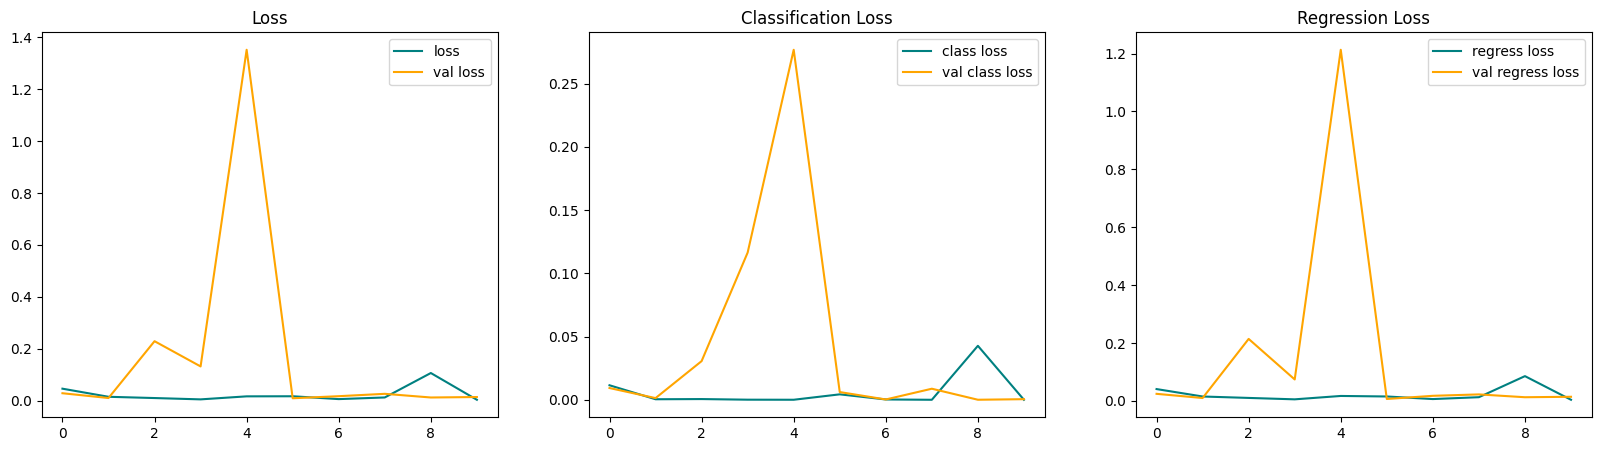

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_sample = test_data.next()

In [ ]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 18ms/step


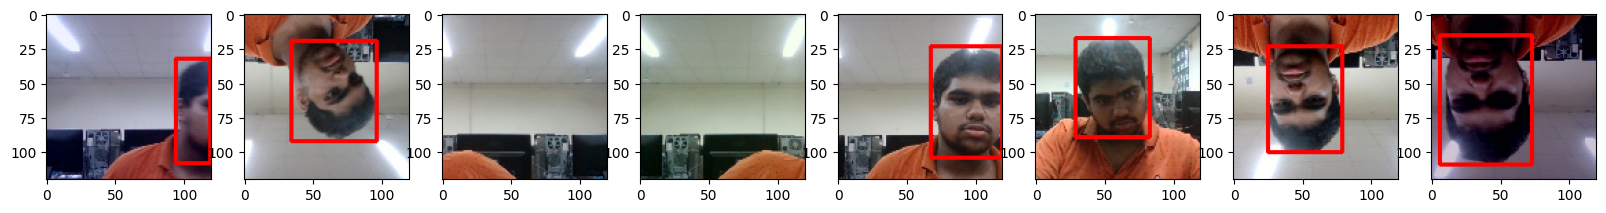

In [ ]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx in range(8):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.5:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                            (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [106]:
from tensorflow.keras.models import load_model

In [109]:
facetracker.save('facetracker.h5')

In [110]:
facetracker = load_model('facetracker.h5')

In [111]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))

    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5:
        # Controls the main rectangle
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)),
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])),
                            (255,0,0), -1)

        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()